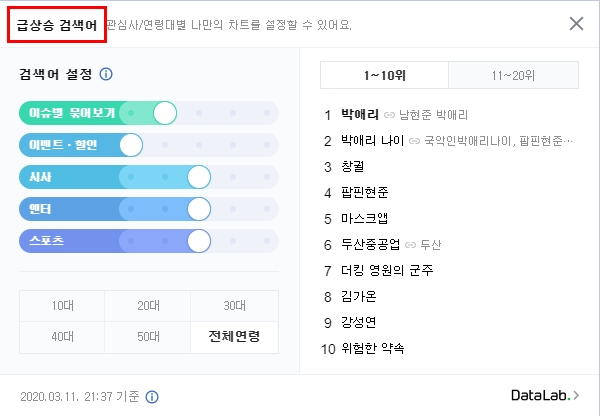

In [1]:
# 크롤링에 사용할 라이브러리를 설치하고 import 한다.
# pip install requests
import requests # 크롤링 할 사이트에 접속해서 html 문서를 읽어온다.
# pip install beautifulsoup4
from bs4 import BeautifulSoup # requests 모듈을 사용해 읽어온 html 문서를 파싱한다.
# 쥬피터 노트북에 이미지를 넣을 때 사용하는 라이브러리 import
from IPython.display import Image
Image("./images/naver01.png", width = "500")    # code안에서 나오게 할 때
# ![title](./images/naver01.png) # markdown안에서 나오게 할 때 

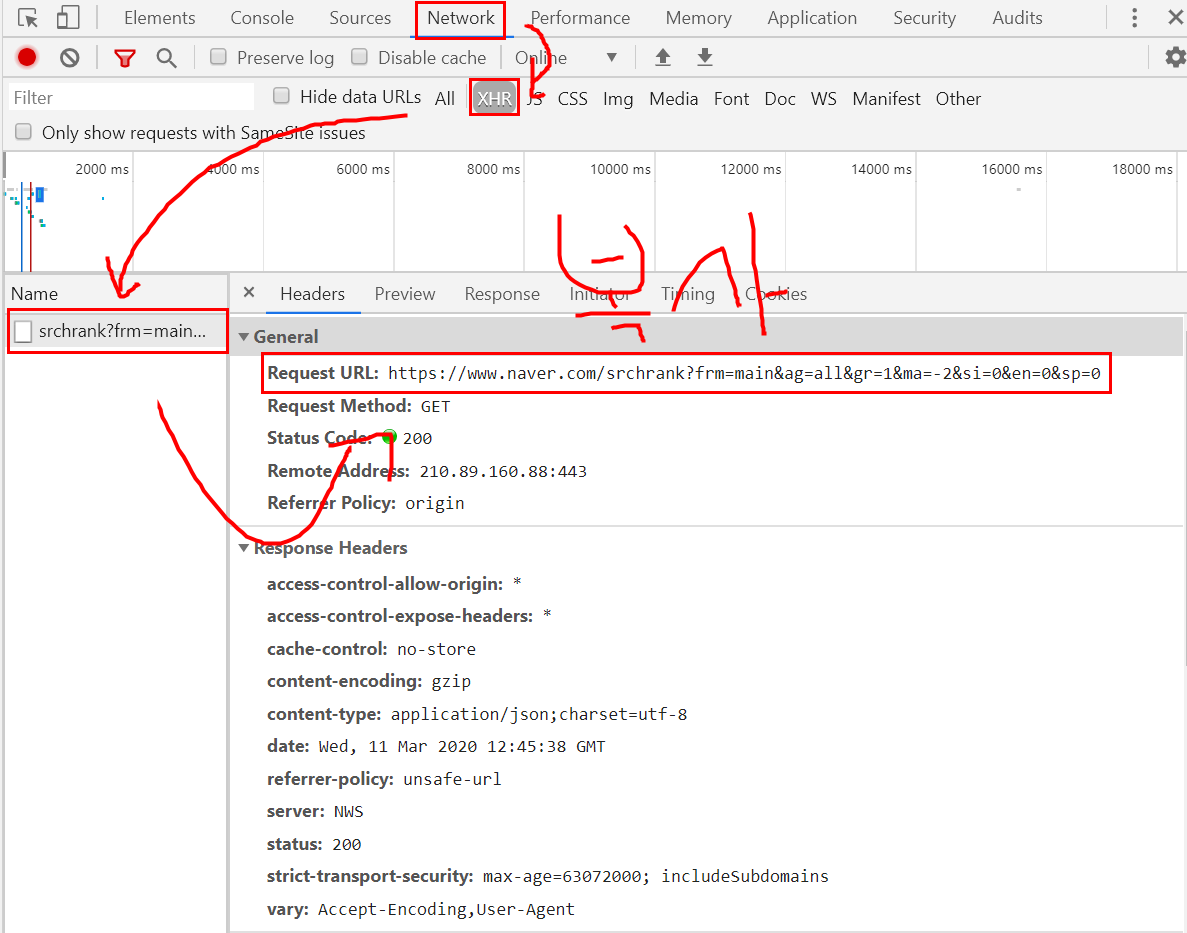

In [2]:
# 네이버 실시간 검색어 크롤링
# 2020년..... 네이버 실시간 검색어를 크롤링 하는 방법이 변경되었다.
# 실시간 검색어가 웹 페이지에 포함되어 있지 않고 ajax를 이용해서 받아오는 방식을 사용한다.
# requests 모듈의 get() 함수를 사용해서 실시간 검색어를 json으로 받는다.
request = requests.get('https://www.naver.com/srchrank?frm=main&ag=all&gr=1&ma=-2&si=0&en=0&sp=0')
# 개발자 모드(크롬에서 F12)에서 아래 그림처럼 Network => XHR(Ajax) => srchrank 클릭 => URL 복사
Image("./images/naver02.png", width="900")

In [3]:
# 실시간 검색어를 저장한다. => JSON 형태로 저장된다.
words = request.text
print(type(words))
print(words)

<class 'str'>
{"ts":"2020-03-11T22:11:00+0900","sm":"agallgrpmamsi0en0sp0","rop":[{"ag":"all"},{"gr":"01"},{"ma":"-2"},{"si":"00"},{"en":"00"},{"sp":"00"}],"data":[{"rank":1,"keyword":"강성연","keyword_synonyms":[]},{"rank":2,"keyword":"김가온","keyword_synonyms":[]},{"rank":3,"keyword":"박애리","keyword_synonyms":["남현준 박애리"]},{"rank":4,"keyword":"박애리 나이","keyword_synonyms":["국악인박애리나이","팝핀현준부인나이"]},{"rank":5,"keyword":"결핵","keyword_synonyms":[]},{"rank":6,"keyword":"홍역","keyword_synonyms":[]},{"rank":7,"keyword":"김춘추","keyword_synonyms":[]},{"rank":8,"keyword":"강성연 집","keyword_synonyms":[]},{"rank":9,"keyword":"살림남","keyword_synonyms":["살림남2"]},{"rank":10,"keyword":"팝핀현준","keyword_synonyms":[]},{"rank":11,"keyword":"두산중공업","keyword_synonyms":[]},{"rank":12,"keyword":"창궐","keyword_synonyms":["영화 창궐"]},{"rank":13,"keyword":"a형 간염","keyword_synonyms":[]},{"rank":14,"keyword":"더킹 영원의 군주","keyword_synonyms":[]},{"rank":15,"keyword":"강성연 남편","keyword_synonyms":[]},{"rank":16,"keyword":"살림하는 남자들2","ke

In [4]:
# json 형태의 실시간 검색어를 딕셔너리로 변환시키는 json 모듈을 import 한다.
import json

# json 모듈의 loads() 함수를 사용해서 json 데이터를 딕셔너리 타입으로 변환한다.
words_json = json.loads(words)
print(type(words_json))
# print(len(words_json)) # 딕셔너리의 key 목록 => ts(시간), sm, rop, data(실시간 검색어)
# print(words_json)

<class 'dict'>


In [5]:
# 딕셔너리에서 실시간 검색어만 얻어온다. => 리스트 타입의 데이터가 얻어진다.
ranks = words_json.get('data')
# print(type(ranks))
# print(len(ranks))
# print(ranks)

In [6]:
# 실시간 검색어가 저장된 리스트에는 검색어 순위별로 각각 딕셔너리 타입으로 저장되어 있다.
for rank in ranks:
    print(rank)

{'rank': 1, 'keyword': '강성연', 'keyword_synonyms': []}
{'rank': 2, 'keyword': '김가온', 'keyword_synonyms': []}
{'rank': 3, 'keyword': '박애리', 'keyword_synonyms': ['남현준 박애리']}
{'rank': 4, 'keyword': '박애리 나이', 'keyword_synonyms': ['국악인박애리나이', '팝핀현준부인나이']}
{'rank': 5, 'keyword': '결핵', 'keyword_synonyms': []}
{'rank': 6, 'keyword': '홍역', 'keyword_synonyms': []}
{'rank': 7, 'keyword': '김춘추', 'keyword_synonyms': []}
{'rank': 8, 'keyword': '강성연 집', 'keyword_synonyms': []}
{'rank': 9, 'keyword': '살림남', 'keyword_synonyms': ['살림남2']}
{'rank': 10, 'keyword': '팝핀현준', 'keyword_synonyms': []}
{'rank': 11, 'keyword': '두산중공업', 'keyword_synonyms': []}
{'rank': 12, 'keyword': '창궐', 'keyword_synonyms': ['영화 창궐']}
{'rank': 13, 'keyword': 'a형 간염', 'keyword_synonyms': []}
{'rank': 14, 'keyword': '더킹 영원의 군주', 'keyword_synonyms': []}
{'rank': 15, 'keyword': '강성연 남편', 'keyword_synonyms': []}
{'rank': 16, 'keyword': '살림하는 남자들2', 'keyword_synonyms': []}
{'rank': 17, 'keyword': '메모리스트', 'keyword_synonyms': ['드라마 메모리스

In [8]:
from datetime import datetime as df
print(df.now().strftime('%Y-%m-%d %H:%M:%S'), '현재 네이버 실시간 검색어 순위')
for rank in ranks:
    print('{0:2d}위 {1} - {2}'.format(rank.get('rank'), rank.get('keyword'), \
                rank.get('keyword_synonyms')))

2020-03-11 22:12:47 현재 네이버 실시간 검색어 순위
 1위 강성연 - []
 2위 김가온 - []
 3위 박애리 - ['남현준 박애리']
 4위 박애리 나이 - ['국악인박애리나이', '팝핀현준부인나이']
 5위 결핵 - []
 6위 홍역 - []
 7위 김춘추 - []
 8위 강성연 집 - []
 9위 살림남 - ['살림남2']
10위 팝핀현준 - []
11위 두산중공업 - []
12위 창궐 - ['영화 창궐']
13위 a형 간염 - []
14위 더킹 영원의 군주 - []
15위 강성연 남편 - []
16위 살림하는 남자들2 - []
17위 메모리스트 - ['드라마 메모리스트']
18위 무영탑 - []
19위 더킹 - []
20위 홍역바이러스 - []
